In [ ]:
#
# Projektarbete i Skriptprogrammering
# Esports Statistics from 1998-2024
#
# Grupp 30
# Andreas Lindström
# Johan Lidbäck
# 

# Importera moduler vi behöver
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
import matplotlib

In [ ]:
# Läs in HistoricalEsportData.csv
data = pd.read_csv("HistoricalEsportData.csv")

# Konvertera vetenskaplig notation till decimal
pd.options.display.float_format = '{:,.0f}'.format

# Om du vill konvertera Earnings-kolumnen specifikt:
data["Earnings"] = data["Earnings"].astype(float)  # Säkerställ att det är float

data["Earnings"] = pd.to_numeric(data["Earnings"], errors="coerce")
data["Players"] = pd.to_numeric(data["Players"], errors="coerce")
data["Tournaments"] = pd.to_numeric(data["Tournaments"], errors="coerce")

data["Date"] = pd.to_datetime(data["Date"], errors="coerce")

data["Game_numerical"] = pd.factorize(data["Game"])[0]

In [164]:
ge_data = pd.read_csv("GeneralEsportData.csv")
ge_data["Genre_number"] = pd.factorize(ge_data["Genre"])[0]

In [165]:
data["Genre"] = data["Game"].map(ge_data.set_index("Game")["Genre"])
print(data)
data.to_csv("new_data.csv", index = False)

            Date                                Game  Earnings  Players  \
0     1998-01-01        Command & Conquer: Red Alert    15,000        8   
1     1998-01-01                          QuakeWorld    15,000        8   
2     1998-05-01                            Quake II    15,000        4   
3     1998-05-01                  Total Annihilation    15,000        2   
4     1998-05-01                          QuakeWorld       300        3   
...          ...                                 ...       ...      ...   
10234 2024-10-01       Super Street Fighter II Turbo       340        3   
10235 2024-10-01               Skullgirls 2nd Encore       330        3   
10236 2024-10-01       StarCraft: Evo Complete (Mod)       308        4   
10237 2024-10-01            Melty Blood: Type Lumina       280        3   
10238 2024-10-01  Power Rangers: Battle for the Grid       200        3   

       Tournaments  Game_numerical                 Genre  
0                1               0      

In [166]:
data.describe()

,Date,Earnings,Players,Tournaments,Game_numerical
count,10239,"10,239","10,239","10,239","10,239"
mean,2017-05-30 10:40:45.004395008,"186,278",62,7,230
min,1998-01-01 00:00:00,0,0,1,0
25%,2014-06-01 00:00:00,"1,207",6,1,113
50%,2018-10-01 00:00:00,"11,750",17,2,208
75%,2021-07-01 00:00:00,"77,569",53,6,337
max,2024-10-01 00:00:00,"40,140,651","2,134",172,620
std,NaN,"985,480",136,12,157


In [ ]:
data["Year"] = pd.to_datetime(data["Date"]).dt.year.astype(int)
summ_tournament = data.groupby("Year")["Tournaments"].describe()
print(summ_tournament)

      count  mean  std  min  25%  50%  75%  max
Year                                           
1998     10     1    0    1    1    1    1    2
1999     10     2    1    1    1    1    2    4
2000     34     2    1    1    1    1    2    8
2001     38     2    1    1    1    1    2    5
2002     52     2    1    1    1    1    2    8
2003     83     2    2    1    1    2    3   12
2004     94     3    3    1    1    1    4   12
2005    132     3    3    1    1    2    3   11
2006    147     3    3    1    1    2    4   17
2007    184     3    4    1    1    1    3   23
2008    189     3    3    1    1    2    4   15
2009    177     4    4    1    1    2    6   16
2010    234     4    7    1    1    2    5   59
2011    265     6   14    1    1    3    5   80
2012    332     6   12    1    1    2    5   80
2013    357     7    9    1    1    4    7   60
2014    429     7   11    1    1    3    7   75
2015    546    10   16    1    1    3   10   94
2016    558     9   16    1    1    2   

## reset_index återställer index

In [168]:
summ_money = data.groupby("Game")[["Earnings"]].sum().reset_index()
print(summ_money)

                         Game  Earnings
0                        ARMS    22,760
1    Acceleration of SUGURI 2       410
2                     After-H    83,863
3              Age of Empires   736,285
4           Age of Empires II 3,899,609
..                        ...       ...
616                 eFootball   492,000
617               iRacing.com 3,757,336
618                      osu!   279,093
619                   rFactor    15,084
620                 rFactor 2 2,218,753

[621 rows x 2 columns]


In [169]:
# vi kontrollerar om det finns null-värden
null_values = data.isnull().sum()

null_values

Date              0
Game              0
Earnings          0
Players           0
Tournaments       0
Game_numerical    0
Genre             0
Year              0
dtype: int64

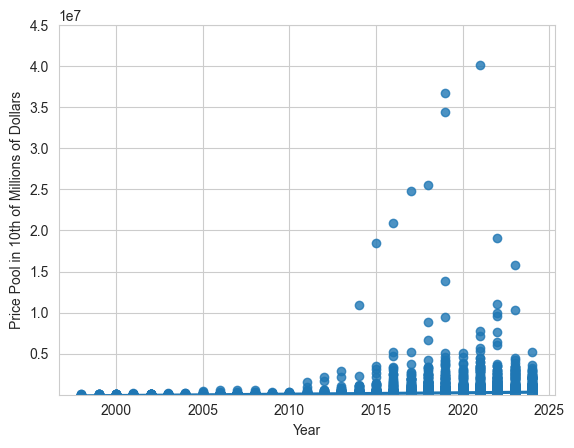

In [170]:
sns.set_style("whitegrid")
axes = sns.regplot(x=data.Year, y=data.Earnings)
axes.set_ylim(10, 45000000)
plt.ylabel("Price Pool in 10th of Millions of Dollars");


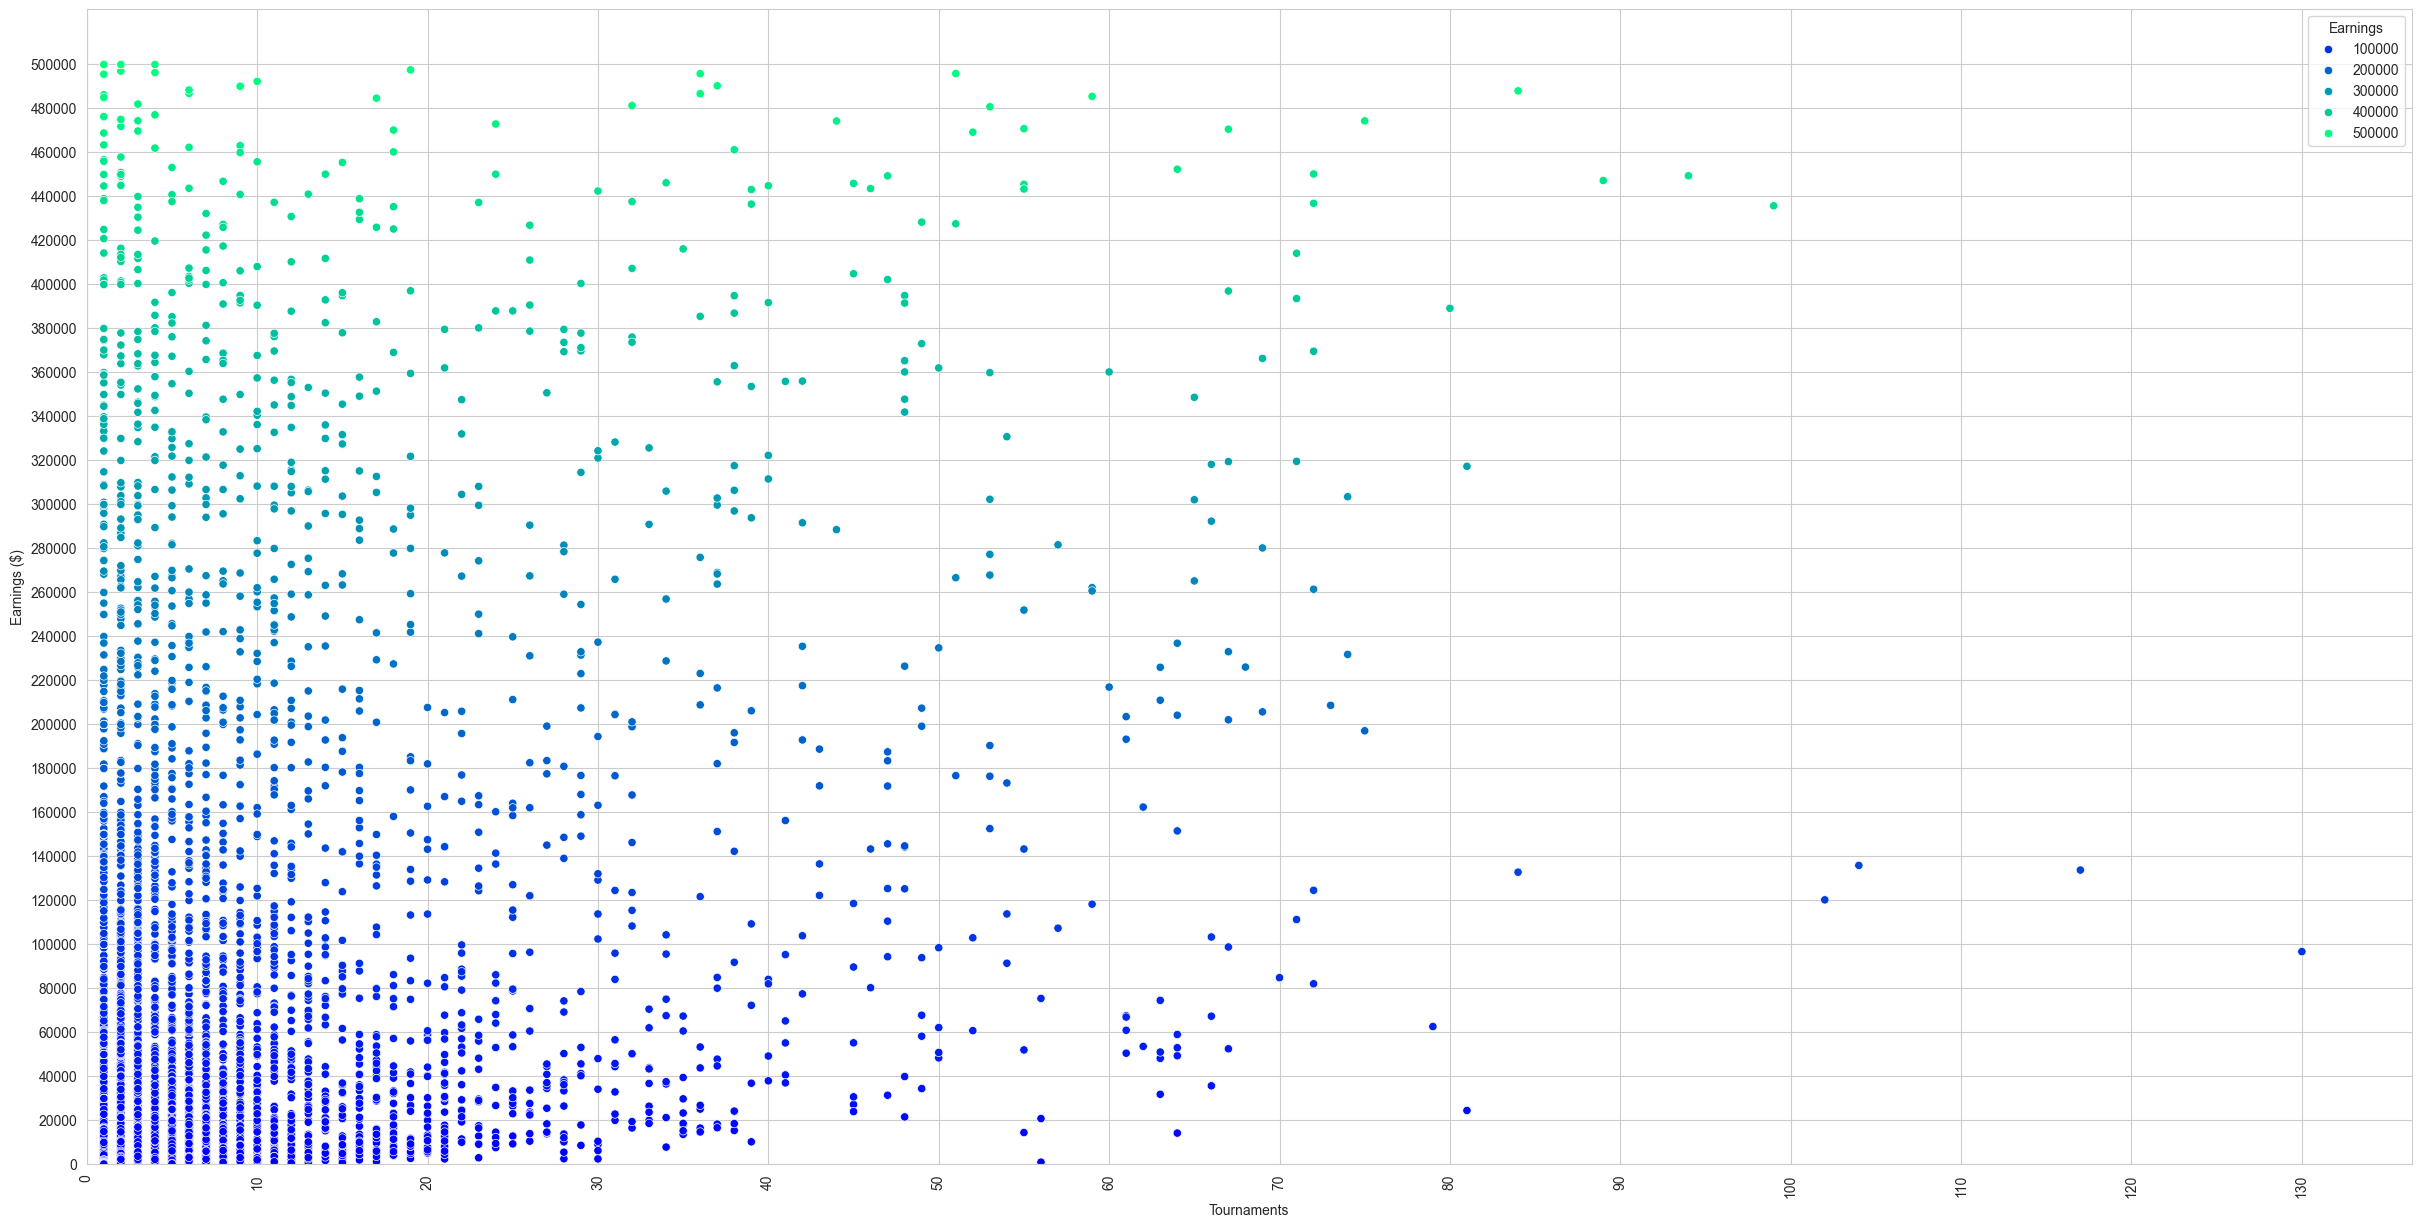

In [ ]:
data["YearMonth"] = data["Date"].dt.strftime("%Y/%m")
plt.figure(figsize=(30, 15))
filter_data = data[(data["Earnings"] > 0) & (data["Earnings"] <= 500000)]
axes = sns.scatterplot(data=filter_data, x="Tournaments", y="Earnings", hue="Earnings", palette = "winter", legend = True)
plt.xticks(np.arange(0, 131, 10), rotation=90);
plt.yticks(np.arange(0, 520000, 20000))
plt.xlim(left=0)
plt.ylim(bottom=-5)
plt.ylabel("Earnings ($)");
plt.xlabel("Tournaments");

Mer åt höger = mer turneringar
Uppåt = högre prispengar

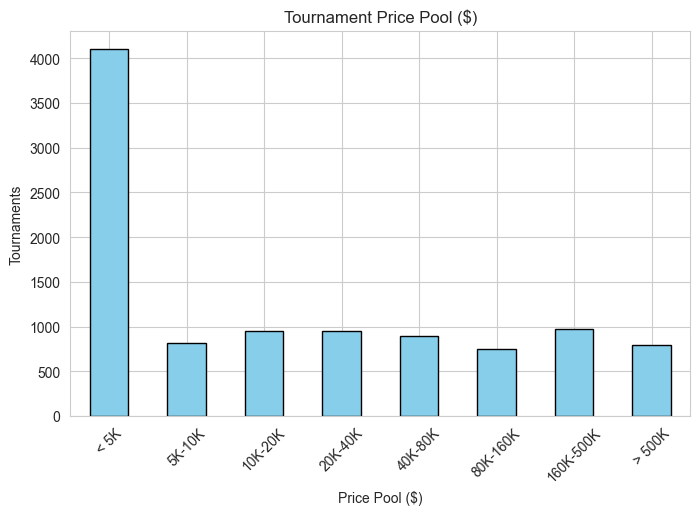

In [ ]:
earnings_bins = [0, 5000, 10000, 20000, 40000, 80000, 160000, 500000, 50000000]
earnings_labels = ["< 5K", "5K-10K", "10K-20K", "20K-40K", "40K-80K", "80K-160K", "160K-500K", "> 500K"]

# Segment earnings into defined bins
data["Earnings_Segment"] = pd.cut(data["Earnings"], bins=earnings_bins, labels=earnings_labels, include_lowest=True)

# Count occurrences in each segment
earnings_segment_counts = data["Earnings_Segment"].value_counts().sort_index()

# Plot segmented earnings distribution
fig, ax = plt.subplots(figsize=(8, 5))
earnings_segment_counts.plot(kind="bar", color="skyblue", edgecolor="black", ax=ax)
ax.set_title("Tournament Price Pool ($)")
ax.set_xlabel("Price Pool ($)")
ax.set_ylabel("Tournaments")
plt.xticks(rotation=45)
plt.show()

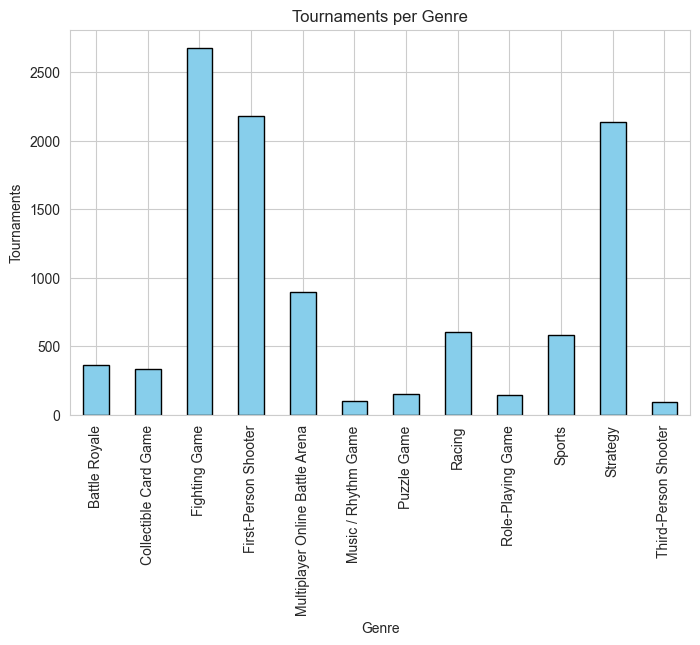

In [ ]:
# Count occurrences in each segment
earnings_segment_counts = data["Genre"].value_counts().sort_index()

# Plot segmented earnings distribution
fig, ax = plt.subplots(figsize=(8, 5))
earnings_segment_counts.plot(kind="bar", color="skyblue", edgecolor="black", ax=ax)
ax.set_title("Tournaments per Genre")
ax.set_xlabel("Genre")
ax.set_ylabel("Tournaments")
plt.xticks(rotation=90)
plt.show()

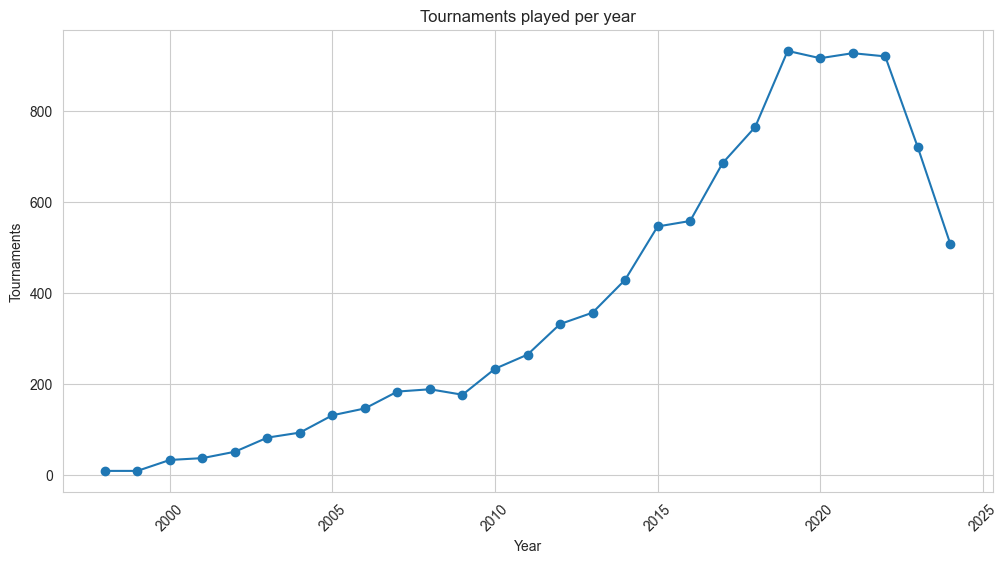

In [ ]:
# Extrahera år
data["Year"] = pd.to_datetime(data["Date"]).dt.year

# Räkna antal turneringar per år
tournaments_per_year = data.groupby("Year").size()

# Plotta historiken
plt.figure(figsize=(12, 6))
plt.plot(tournaments_per_year.index, tournaments_per_year, marker="o", linestyle="-")
plt.xticks(rotation=45)
plt.xlabel("Year")
plt.ylabel("Tournaments")
plt.title("Tournaments played per year")
plt.grid(True)
plt.show()

This is a Time series plot that shows number of tournaments played per year.
It peaks at approximately 930 tournaments between the years 2017 - 2019

In [175]:
pivot = data.pivot_table(values="Earnings", index="Year", columns="Game", aggfunc="mean").fillna(0).round(2)
pivot

Game,ARMS,Acceleration of SUGURI 2,After-H,Age of Empires,Age of Empires II,Age of Empires III,Age of Empires IV,Age of Empires Online,Age of Mythology,Aim Gods,...,Zombieland VR: Headshot Fever,Zula,Zwift,chess24,chessarena.com,eFootball,iRacing.com,osu!,rFactor,rFactor 2
Year,,,,,,,,,,,,,,,,,,,,,
1998,0,0,0,"2,000",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2000,0,0,0,"9,500","12,641",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2001,0,0,0,0,"20,068",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2002,0,0,0,100,"8,108",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2003,0,0,0,625,"2,770",0,0,0,"14,882",0,...,0,0,0,0,0,0,0,0,0,0
2004,0,0,0,0,"5,696",0,0,0,"3,394",0,...,0,0,0,0,0,0,0,0,0,0
2005,0,0,0,0,"4,082",0,0,0,"2,250",0,...,0,0,0,0,0,0,0,0,0,0
2006,0,0,0,145,"6,333","1,125",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


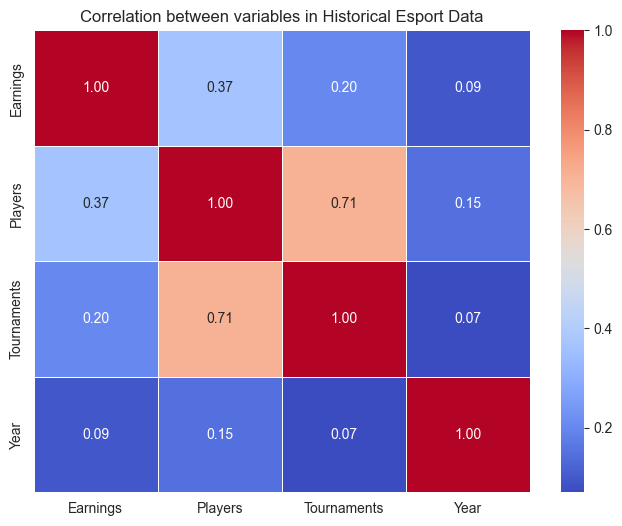

In [ ]:
fixed_data = data.drop(columns=["Game_numerical"], errors = "ignore")
fixed_corr = fixed_data.select_dtypes(include=["number"]).corr()

plt.figure(figsize=(8, 6))
sns.heatmap(fixed_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidth=0.5)
plt.title("Correlation between variables in Historical Esport Data")
plt.show()

This is a HeatMap of correlations which shows the relationship between the variables.
1.00 = perfect positive correlation
0.00 = no correlation between the variables
-1.00 = perfect negative correlation

Players & Tournaments --> high correlation: 0.71 --> More players often means more tournaments

Year & Earnings --> low correlation: 0,09 --> Which year it is doesn´t affect the earnings that much

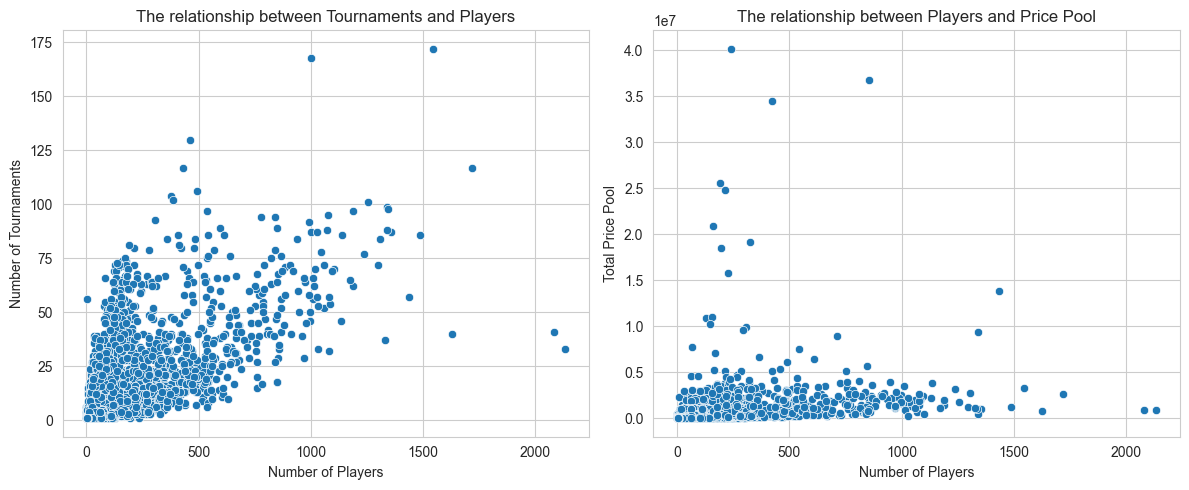

In [182]:
# Skapar scatter-plots för att visa relationerna mellan variablerna
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Scatter-plot mellan Players och Tournaments (hög korrelation)
sns.scatterplot(y=data["Tournaments"], x=data["Players"], ax=axes[0])
axes[0].set_title("The relationship between Tournaments and Players")
axes[0].set_ylabel("Number of Tournaments")
axes[0].set_xlabel("Number of Players")

# Scatter-plot mellan Earnings och Players (lägre korrelation)
sns.scatterplot(x=data["Players"], y=data["Earnings"], ax=axes[1])
axes[1].set_title("The relationship between Players and Price Pool")
axes[1].set_ylabel("Total Price Pool")
axes[1].set_xlabel("Number of Players")

plt.tight_layout()
plt.show()

The left graph shows the correlation between number of tournaments and number of players. High correlation

The more players a game has, the more tournaments are arranged. 

The right graph shows the correlation between the number of players and total earnings. weaker correlation

Popularity doesn´t always mean higher total earnings and some games have higher total earnings and fewer players. (maybe its because of sponsors)

In [ ]:
# Skapar en ny kolumn "Earnings per Tournament"
data["Earnings per Tournament"] = data["Earnings"] / data["Tournaments"]

# Ersätt NaN eller oändliga värden (om det finns turneringar med 0 värde)
data["Earnings per Tournament"] = data["Earnings per Tournament"].replace([float("inf"), -float("inf")], 0).fillna(0)

print(data["Earnings per Tournament"].describe())

count      10,239
mean       43,060
std       199,796
min             0
25%           568
50%         3,730
75%        19,266
max     8,028,130
Name: Earnings per Tournament, dtype: float64


Vi har tagit reda på pengar som delats ut i turneringar mellan åren 1998-2024 samt antalet spelare per turnering.

Vi har även tagit med:
korreleration mellan variablerna: spelare, år, turneringar och prispengar

Vi kan se vilka Genrer som har flest turneringar

Esport har blivit mer populärt med åren enligt vår data.

vi kan se hur många turneringar som spelats varje år



FRÅGA 12
vill man tjäna mest pengar ska man spela? *spelet* *vänt*

Vilket spel har haft flest turneringar genom tiderna? ???
Vilket spel har haft störst ökning i prispengar över tid? ???

Vilken genre har vuxit snabbast i antal turneringar? *intressant*

Vilket spel har flest turneringar men minst prispengar? ???

Kan vi förutse vilka spel/kategorier som kommer vara störst inom esport om 5 år? *intressant*


Vilken genre är populärast i Esport mellan åren? ?????????????????mellan åren?
Which genre is the most popular?

byta till Occurrences?? eller games per genre??


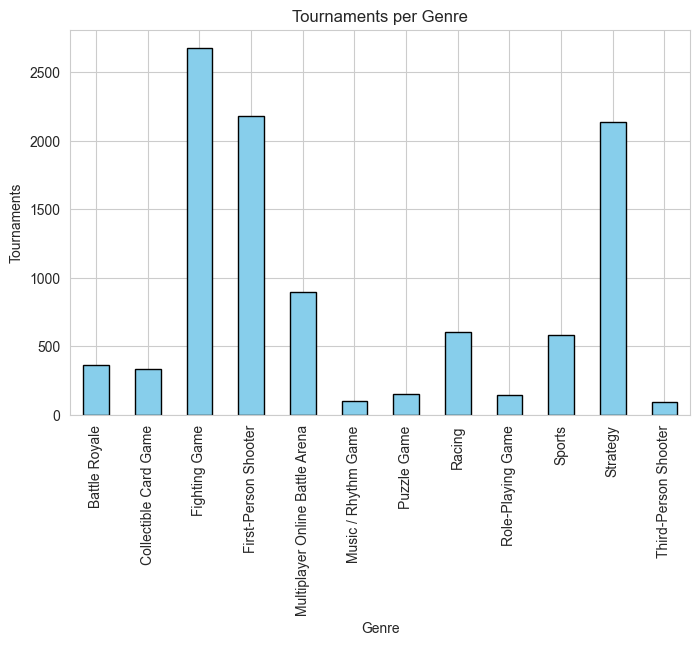

Most popular: Fighting games, First-Person shooters och strategy games

Which year had the most tournaments?

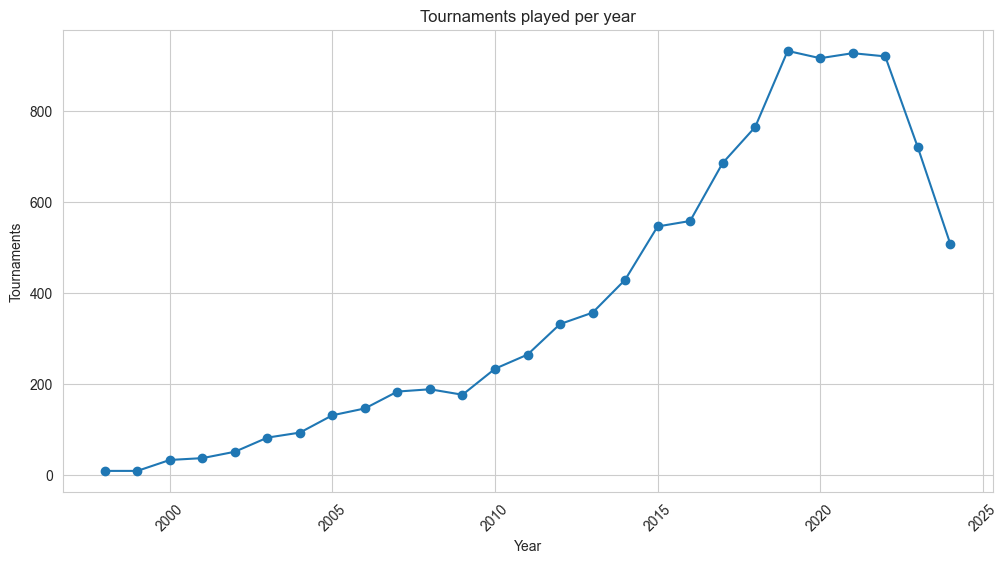

As you can se somewhere around year 2019 was the most tournaments played and after the year 2022 we can se a decrease which could have been a delayed consequence from the pandemic

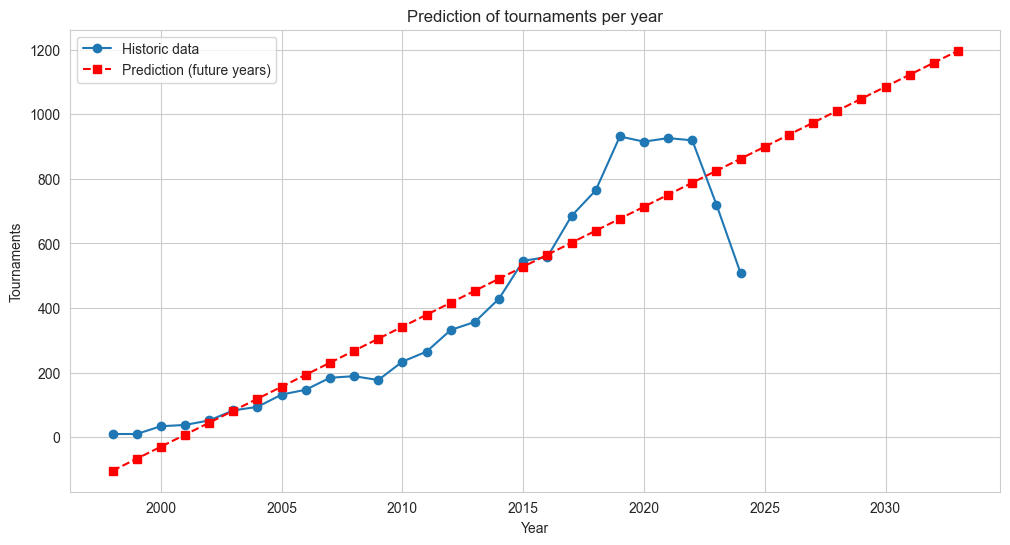

In [179]:
# Förbered data för regression
X = tournaments_per_year.index.values.reshape(-1, 1)  # År som input
y = tournaments_per_year.values  # Antal turneringar som output

# Skapa och träna modellen
model = LinearRegression()
model.fit(X, y)

# Prediktera framtida år
future_years = np.arange(X.min(), X.max() + 10).reshape(-1, 1)  # Prognos 10 år framåt
predictions = model.predict(future_years)

# Plotta historik och prognos
plt.figure(figsize=(12, 6))
plt.plot(tournaments_per_year.index, tournaments_per_year, marker="o", linestyle="-", label="Historic data")
plt.plot(future_years, predictions, marker="s", linestyle="--", label="Prediction (future years)", color="red")
plt.xlabel("Year")
plt.ylabel("Tournaments")
plt.title("Prediction of tournaments per year")
plt.legend()
plt.grid(True)




Above, we have created a linearregressionanalyses that predicts the number of tournaments that will be arranged in the future.
The red line predicts 10year in the future.
The blue line is the historic data from our csv files.?? files?? file??

FKK PROBLEM MED MODELLEN
Den tar inte hänsyn till plötsliga förändringar, som exempelvis ekonomiska faktorer, pandemieffekter eller mättnad i marknaden.

I stället för linjär regression kan vi testa:
Polynomiell regression för att fånga icke-linjära trender.


Denna modell fungerar endast om tillväxten varit stabil och linjär, men den missar tydligt förändringar i verkligheten. Om vi vill ha en mer realistisk prognos, bör vi använda mer avancerade modeller eller förstå varför turneringarna minskar

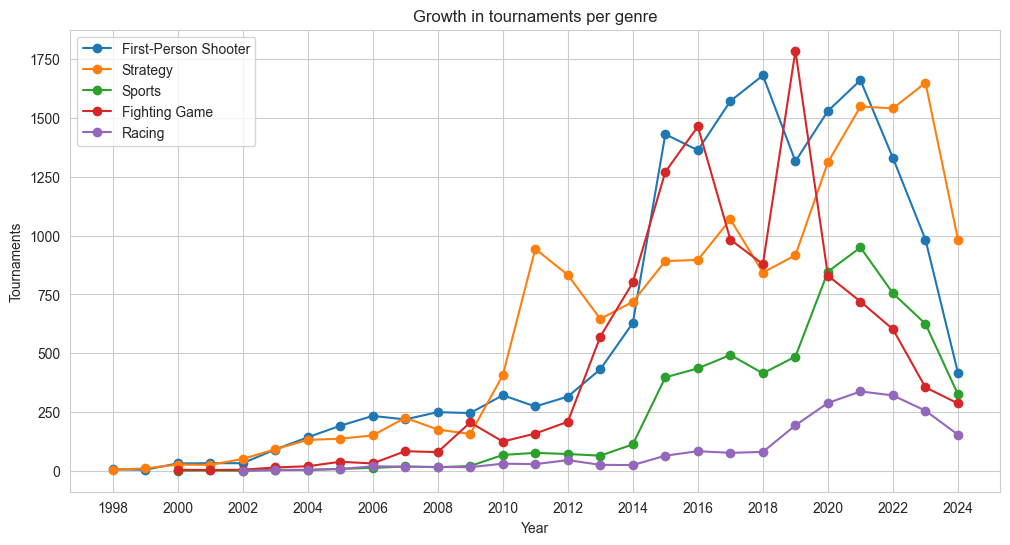

In [180]:
#Vilken genre har vuxit snabbast i antal turneringar? *intressant*
# Gruppera efter genre och år, summera antalet turneringar
growth = data.groupby(["Genre", "Year"])["Tournaments"].sum().reset_index()

# Beräkna Genomsnittlig årlig tillväxt
pivot_growth = growth.pivot(index="Year", columns="Genre", values="Tournaments").fillna(0)

#beräkning per genre
result = {}
years = pivot_growth.index

for genre in pivot_growth.columns:
    start_year = pivot_growth.loc[years.min(), genre]
    end_year = pivot_growth.loc[years.max(), genre]
    diff = years.max() - years.min()

    # CAGR = Compound Annual Growth Rate
    if start_year > 0 and diff > 0:
        cagr = ((end_year / start_year) ** (1 / diff)) - 1
        result[genre] = cagr

#Konvertera till DataFrame för visning
cagr_dataframe = pd.DataFrame(result.items(), columns=["Genre", "CAGR"]).sort_values(by="CAGR", ascending=False)

# Filtrera ut genrer med tillräcklig data för att göra en meningsfull visualisering
top_five_genres = growth["Genre"].value_counts().index[:5]

# Filtrera datasetet för att inkludera dessa genrer
filtered_growth = growth[growth["Genre"].isin(top_five_genres)]

# Skapa ett linjediagram för att visa tillväxten av turneringar per genre över tid
plt.figure(figsize=(12, 6))

for genre in top_five_genres:
    subset = filtered_growth[filtered_growth["Genre"]==genre]
    plt.plot(subset["Year"], subset["Tournaments"], marker="o", label=genre)

# Anpassa x-axeln för att visa fler sektioner (varannat år)
plt.xticks(np.arange(growth["Year"].min(), growth["Year"].max() + 1, 2))

plt.xlabel("Year")
plt.ylabel("Tournaments")
plt.title("Growth in tournaments per genre")
plt.legend()
plt.grid(True)


Above, We answer the question: which genre has grown the fastest in arranged tournaments
We can se that First-Person shooters have risen rapidly and the same thing goes for Fight games which also has its up and downs. An honourable mention is strategy games which has a more stable growth.
ovanför besvaras: Vilken genre som har vuxit snabbast i antal arrangerade turneringar.


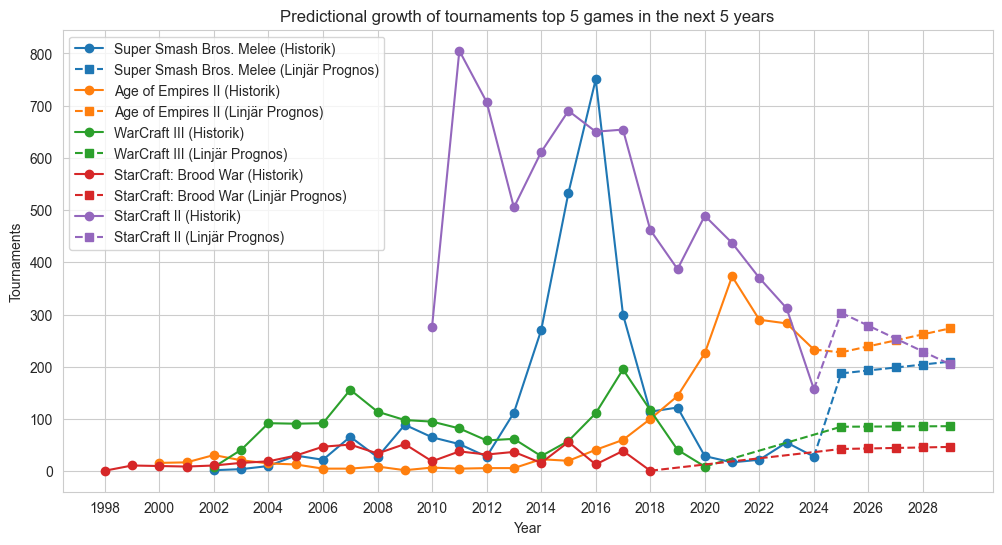

In [ ]:
#Kan vi förutse vilka spel/kategorier som kommer vara störst inom esport om 5 år?

# Skapa en figur för att visualisera de 5 största spelen med linjär regression
plt.figure(figsize=(12, 6))

top_five_games = data["Game"].value_counts().index[:5]
upcoming_years = list(range(data["Year"].max() + 1, data["Year"].max() + 6))

predict_results = {}

# Definiera färger för varje spel
colors = matplotlib.colormaps.get_cmap("tab10")
color_map = {game: colors(i % 10) for i, game in enumerate(top_five_games)}

# Prognosera framtida tillväxt för de 5 mest populära spelen
for game in top_five_games:
    subset = data[data["Game"] == game].copy()
    subset["Year"] = pd.to_datetime(subset["Date"]).dt.year
    subset = subset.groupby("Year")["Tournaments"].sum().reset_index()

    # Om det finns för få datapunkter, hoppa över
    if len(subset) < 3:
        continue

    # Förbered data för linjär regression
    X = subset["Year"].values.reshape(-1, 1)
    y = subset["Tournaments"].values

    # Träna en linjär regressionsmodell
    model = LinearRegression()
    model.fit(X, y)

    # Gör en prognos för de kommande 5 åren
    x_prediction = np.array(upcoming_years).reshape(-1, 1)
    prediction = model.predict(x_prediction)

    # Spara prognosen
    predict_results[game] = prediction

  # Plotta historisk data
    plt.plot(subset["Year"], subset["Tournaments"], marker="o", linestyle="-", label=f"{game} (Historik)", color=color_map[game])

    # För att få en linje som går från sista datapunkten till första prediktiva punkt
    plt.plot([subset["Year"].iloc[-1], upcoming_years[0]], [subset["Tournaments"].iloc[-1], prediction[0]],
             linestyle="--", color=color_map[game])

    # Plotta prognosen med linjär regression
    plt.plot(upcoming_years, prediction, linestyle="--", marker="s", label=f"{game} (Linjär Prognos)", color=color_map[game])

    # Anpassa x-axeln för att inkludera framtida år
plt.xticks(np.arange(data["Year"].min(), max(upcoming_years) + 1, 2))


plt.xlabel("Year")
plt.ylabel("Tournaments")
plt.title("Predictional growth of tournaments top 5 games in the next 5 years")
plt.legend()
plt.grid(True)

Above shows the prediction of esports 5 biggest games in 5 years.
The graph says that Starcraft 2 has the most tournamnets and Age of Empires takes the lead in the year 2030